# Optimizing Game Environments: A Comprehensive Study of AI Pathfinding Techniques

### Domain : Games
### Description:
In this coursework, we delve into the fascinating realm of AI pathfinding within the domain of video games. Navigating characters efficiently through dynamic and obstacle-laden game environments is a crucial aspect of creating immersive gaming experiences. We explore three distinct AI pathfinding techniques, analyzing their strengths, weaknesses, and applicability in gaming scenarios. Our selected techniques include traditional A* algorithms, machine learning-based approaches, and heuristic-based optimizations. By comparing and evaluating these techniques, we aim to uncover the most effective strategies for game developers to enhance player experiences. The study also addresses the specific input data requirements and expected output outcomes associated with each technique. Join us on this exploration of AI-driven pathfinding, where strategic decisions and innovative solutions shape the virtual landscapes of tomorrow's gaming worlds. (thanks GPT)


# Implementation

This cell includes the import statements for the required libraries: matplotlib for plotting, numpy for numerical operations, and heapq for the priority queue used in the A* algorithm. random is imported for generating random obstacle positions.

In [88]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappop, heappush
import random


This cell defines the A* pathfinding algorithm with helper functions: neighbors, heuristic, and reconstruct_path. The A* algorithm is used to find the optimal path from the start point to the goal on a grid with obstacles.

In [89]:
# Define the A* pathfinding algorithm with least steps priority
def astar_least_steps(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    all_paths = []  # Track all paths explored
    path = []  # Initialize the path variable
    iterations = 0  # Counter for iterations taken

    while open_set:
        current_cost, current_node = heappop(open_set)
        iterations += 1  # Increment the iteration counter

        for neighbor in neighbors(current_node, rows, cols, grid):
            new_cost = cost_so_far[current_node] + 1  # Each step has a cost of 1

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = len(path)  # Prioritize fewer steps
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                path = reconstruct_path(came_from, start, neighbor)  # Update the path

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

    if all_paths:
        # Find the shortest path among all explored paths
        shortest_path = min(all_paths, key=len)
        print("------------------------------ Shortest Path ----------------------------------")
        print(f"Number of iterations: {iterations}")
        print(f"Number of steps: {len(shortest_path) - 1}")  # Subtract 1 to get the number of steps
        print("-------------------------------------------------------------------------------")
        return shortest_path, all_paths
    else:
        print("No path found.")
        return [], all_paths



In [90]:
# Define the A* pathfinding algorithm with weights
def astar(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    weights_along_path = {start: [grid[start[0], start[1]]]}  # Track weights along the path
    all_paths = []  # Track all paths explored
    iterations = 0  # Counter for iterations taken

    while open_set:
        current_cost, current_node = heappop(open_set)
        iterations += 1  # Increment the iteration counter

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

            # Print weights along the path before returning
            total_cost = sum(random_numbers[node[0], node[1]] for node in path)  # Calculate total cost
            weights_str = " + ".join(map(str, weights_along_path[goal]))
            
            print("-------------------------- Shortest Path Weighted -----------------------------")
            print(f"Number of iterations: {iterations}")
            # Count the steps from start to goal
            num_steps = len(path) - 1
            print(f"Number of steps: {num_steps}")
            # print(f'Total cost = {weights_str}  \n           = {total_cost}')  #uncomment for full math output
            print(f'Total cost = {total_cost}')
            print("-------------------------------------------------------------------------------")
            
            return path, total_cost, weights_along_path, all_paths

        for neighbor in neighbors(current_node, rows, cols, grid):
            weight = random_numbers[neighbor[0], neighbor[1]]  # Use weights from random_numbers
            new_cost = cost_so_far[current_node] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(goal, neighbor)
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                # Update weights along the path
                weights_along_path[neighbor] = weights_along_path[current_node] + [weight]
                iterations += 1  # Increment the iteration counter for each movement

    # If the goal is not reached, return an empty path
    print("No path found.")
    return [], float('inf'), {}, all_paths




In [225]:
# Cell 4 (Updated)
# Define the A* pathfinding algorithm for Perlin noise-based terrain
def astar_terrain(start, goal, terrain):
    rows, cols = terrain.shape
    open_set = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}
    weights_along_path = {start: [terrain[start[0], start[1]]]}  # Track weights along the path
    all_paths = []  # Track all paths explored
    iterations = 0  # Counter for iterations taken

    while open_set:
        current_cost, current_node = heappop(open_set)
        iterations += 1  # Increment the iteration counter

        if current_node == goal:
            # Store the full path
            path = reconstruct_path(came_from, start, goal)
            all_paths.append(path)

            # Print weights along the path before returning
            total_cost = sum(terrain[node[0], node[1]] for node in path)  # Calculate total cost
            weights_str = " + ".join(map(str, weights_along_path[goal]))

            print("--------------------- Shortest Path on Terrain ----------------------")
            print(f"Number of iterations: {iterations}")
            num_steps = len(path) - 1
            print(f"Number of steps: {num_steps}")
            print(f'Total cost = {total_cost}')
            print("-----------------------------------------------------------------------")

            return path, total_cost, weights_along_path, all_paths

        for neighbor in neighbors(current_node, rows, cols, terrain):
            weight = terrain[neighbor[0], neighbor[1]]  # Use weights from terrain
            new_cost = cost_so_far[current_node] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(current_node, goal)  # Update priority calculation
                heappush(open_set, (priority, neighbor))
                came_from[neighbor] = current_node
                # Update weights along the path
                weights_along_path[neighbor] = weights_along_path[current_node] + [weight]

    # If the goal is not reached, return an empty path
    print("No path found.")
    return [], float('inf'), {}, all_paths



This cell defines the neighbors function, which returns the valid neighboring nodes for a given node on the grid. It considers the boundaries and obstacles in the grid.

In [134]:
# Cell 5 (Updated)
# Define helper function to get neighboring nodes
def neighbors(node, rows, cols, terrain):
    row, col = node
    neighbors = []
    if row > 0 and terrain[row - 1, col] in [1, 2, 3]:
        neighbors.append((row - 1, col))
    if row < rows - 1 and terrain[row + 1, col] in [1, 2, 3]:
        neighbors.append((row + 1, col))
    if col > 0 and terrain[row, col - 1] in [1, 2, 3]:
        neighbors.append((row, col - 1))
    if col < cols - 1 and terrain[row, col + 1] in [1, 2, 3]:
        neighbors.append((row, col + 1))
    return neighbors



This cell defines the heuristic function used in the A* algorithm. The heuristic estimates the cost from a given node to the goal.

In [120]:
# Define heuristic function for A*
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


This cell defines the reconstruct_path function, which reconstructs the optimal path from the came_from dictionary generated during the A* search.

In [121]:
# Define function to reconstruct the path from start to goal
def reconstruct_path(came_from, start, goal):
    current = goal
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


This cell initializes the game environment by creating a grid with a specified size and adding random obstacles to the grid based on the given density.

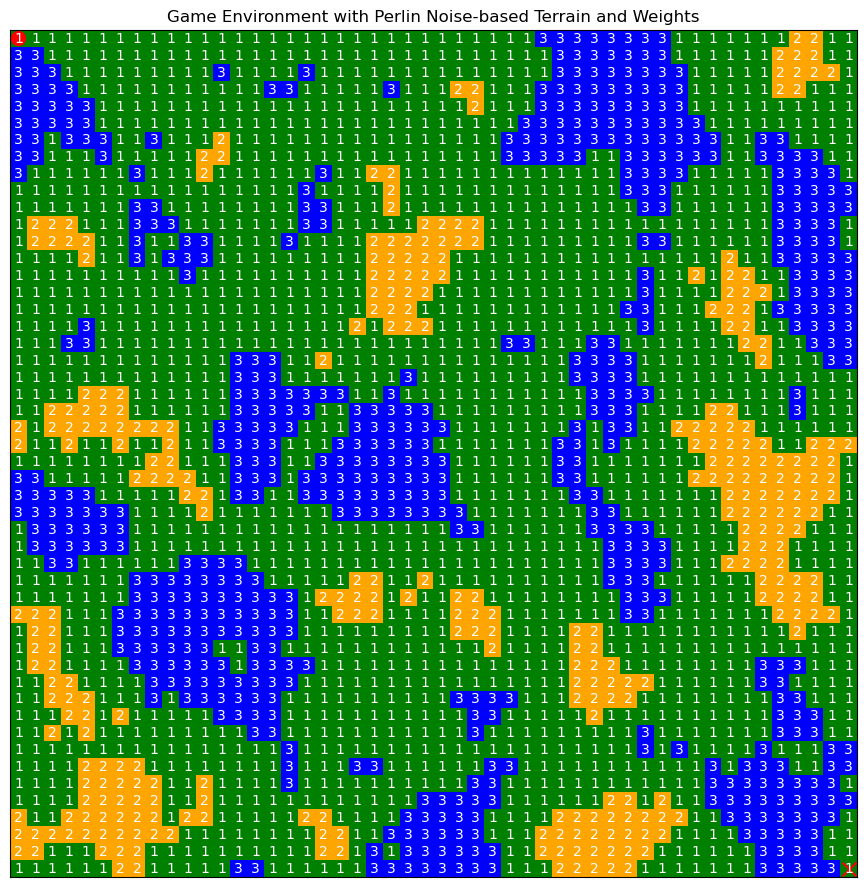

In [226]:
# Cell 8 (Updated)
# Define the game environment with Perlin noise-based terrain
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import noise
import random

# Function to generate 2D Perlin noise
def generate_perlin_noise(shape, scale=100.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=None):
    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=octaves,
                                        persistence=persistence,
                                        lacunarity=lacunarity,
                                        repeatx=1024,
                                        repeaty=1024,
                                        base=seed)
    return world

# Define the terrain with three colors: blue (water), green (grass), yellow (sand)
grid_size = (50, 50)  # Adjust the grid size as needed
terrain_density = [0.4, 0.3, 0.3]  # Adjust the density for each color

# Generate 2D Perlin noise for the terrain with the random seed
terrain_noise = generate_perlin_noise(grid_size, scale=10.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=random.randint(0, 1000))

# Normalize the noise values to be between 0 and 1
terrain_noise = (terrain_noise - np.min(terrain_noise)) / (np.max(terrain_noise) - np.min(terrain_noise))

# Categorize the terrain based on noise values and density
terrain = np.zeros(grid_size, dtype=int)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if terrain_noise[i, j] < terrain_density[0]:
            terrain[i, j] = 3  # Water
        elif terrain_noise[i, j] < terrain_density[0] + terrain_density[1]:
            terrain[i, j] = 1  # Grass
        else:
            terrain[i, j] = 2  # Sand

# Visualize the terrain with custom colormap
plt.figure(figsize=(11, 11))  # Adjust the figure size

# Define custom colormap for water, grass, and sand
colors_terrain = ['green', 'orange', 'blue']
custom_cmap_terrain = ListedColormap(colors_terrain)

# Create a custom normalization for the colormap
norm = plt.Normalize(1, 3)

# Create a color array for the terrain using the colormap and normalization
terrain_color = custom_cmap_terrain(norm(terrain))

# Display the terrain with the custom colormap
plt.imshow(terrain_color, origin='upper', interpolation='none', vmin=1, vmax=3)

# Mark the start and goal points (optional)
start_point_terrain = (0, 0)
goal_point_terrain = (grid_size[0] - 1, grid_size[1] - 1)

# Mark the start and goal points
plt.scatter(*start_point_terrain, color='red', marker='o', s=100, label='Start')
plt.scatter(*goal_point_terrain, color='red', marker='x', s=100, label='Goal')

# Add weights as text on each walkable box using stored values
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        weight = 3 if terrain[i, j] == 3 else 1 if terrain[i, j] == 1 else 2  # Water has weight 3, Grass has weight 1, Sand has weight 2
        plt.text(j, i, str(weight), ha='center', va='center', color='white')

# Hide only the ticks and tick labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.title('Game Environment with Perlin Noise-based Terrain and Weights')
plt.show()


This cell calls the A* algorithm to find the optimal path from the start to the goal in the defined grid.

In [227]:
# Cell 8 (Updated)
# Find the optimal path on Perlin noise-based terrain using A*
terrain_optimal_path, _, _, _ = astar_terrain(start_point_terrain, goal_point_terrain, terrain)




--------------------- Shortest Path on Terrain ----------------------
Number of iterations: 2157
Number of steps: 98
Total cost = 105
-----------------------------------------------------------------------


This cell visualizes the grid, the start and goal points, and the optimal path using Matplotlib. The figure size is adjusted for better visibility. Green represents the start point, red represents the goal point, and blue represents the optimal path on the grid with obstacles.

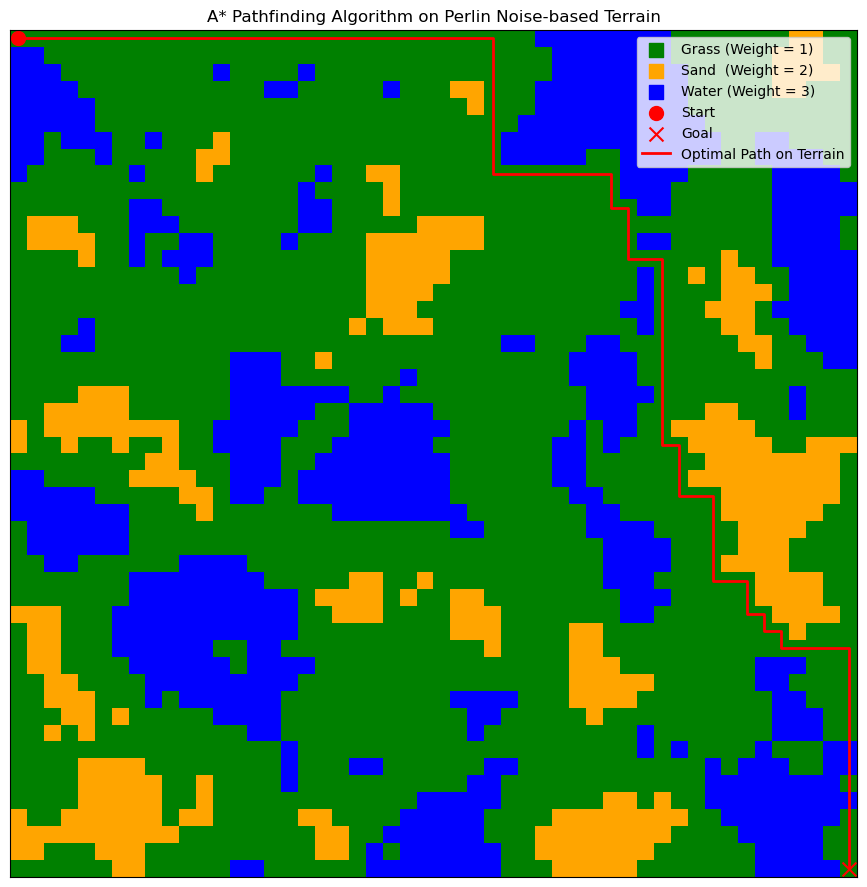

In [229]:
# Cell 10 (Updated)
# Visualize the terrain and the optimal path with adjusted figure size
plt.figure(figsize=(11, 11))  # Adjust the figure size

# Define custom colormap for water, grass, and sand
colors_terrain = ['green', 'orange', 'blue']
custom_cmap_terrain = ListedColormap(colors_terrain)

# Create a custom normalization for the colormap
norm = plt.Normalize(1, 3)

# Create a color array for the terrain using the colormap and normalization
terrain_color = custom_cmap_terrain(norm(terrain))

# Display the terrain with the custom colormap
plt.imshow(terrain_color, origin='upper', interpolation='none', vmin=1, vmax=3)

# Define labels for the legend without actually marking the points
plt.scatter([], [], color='green', marker='s', s=100, label='Grass (Weight = 1)')
plt.scatter([], [], color='orange', marker='s', s=100, label='Sand  (Weight = 2)')
plt.scatter([], [], color='blue', marker='s', s=100, label='Water (Weight = 3)')

# Mark the start and goal points
plt.scatter(*start_point_terrain, color='red', marker='o', s=100, label='Start')
plt.scatter(*goal_point_terrain, color='red', marker='x', s=100, label='Goal')

# Plot the optimal path on Perlin noise-based terrain in yellow
optimal_path_terrain_x, optimal_path_terrain_y = zip(*terrain_optimal_path)
plt.plot(optimal_path_terrain_y, optimal_path_terrain_x, color='Red', linewidth=2, label='Optimal Path on Terrain')

# Hide only the ticks and tick labels
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.legend(loc='upper right')



plt.title('A* Pathfinding Algorithm on Perlin Noise-based Terrain')
plt.show()


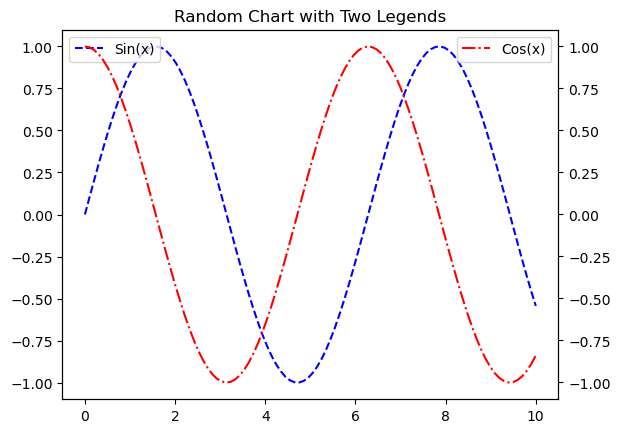

In [194]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot the first set of data
plt.plot(x, y1, label='Sin(x)', color='blue', linestyle='--')

# Add legend for the first set of data in the upper left corner
plt.legend(loc='upper left')

# Create a second axis for the second set of data
ax2 = plt.gca().twinx()

# Plot the second set of data on the second axis
ax2.plot(x, y2, label='Cos(x)', color='red', linestyle='-.')

# Add legend for the second set of data in the upper right corner
ax2.legend(loc='upper right')

plt.title('Random Chart with Two Legends')
plt.show()
